In [1]:
import os
import math
import pickle
import numpy as np
from math import log
from scipy import signal 
import matplotlib as mpl
from statistics import mean
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

In [15]:
from pylab import rcParams
rcParams['figure.figsize'] = 9, 6
rcParams.update({'figure.max_open_warning': 0, 'font.size': 14, 'axes.titlesize': 14,
                 'axes.labelsize': 14, 'axes.grid':True, 'xtick.direction': 'in', 'ytick.direction': 'in',
                 'ytick.right': True, 'xtick.top':True, 'ytick.major.size': 10, 'xtick.major.size': 10,
                 'legend.fancybox': True, 'legend.markerscale': 0.8, 'legend.handlelength': 5.0})

#from cycler import cycler
mpl.rcParams['grid.linestyle'] = '-.'
#rcParams.keys() 
#plt.style.use('dark_background')
#print(plt.style.available)

In [16]:
pkl_file = open('../2020-02-27_10-16-47.pkl', 'rb')
mydata = pickle.load(pkl_file)
mydata.keys()

dict_keys(['Ch1', 'Ch2', 'Ch3', 'Ch4', 'Ch5', 'Ch7'])

In [17]:
print(mydata['Ch4'].shape)   

(10000, 2000)


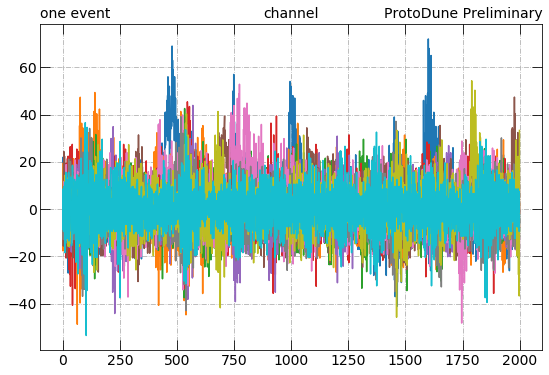

In [18]:
for x in range(10):
    #print(x)
    data=(mydata['Ch4'][x])
    plt.plot((data))
    plt.title('channel')
    plt.title('one event', loc='left')
    plt.title('ProtoDune Preliminary', loc='right')
    plt.grid(True)

plt.show()



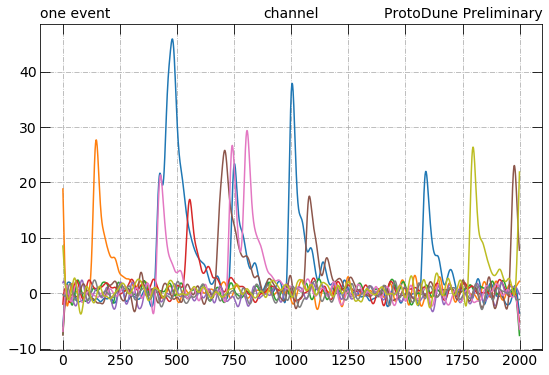

In [19]:
from scipy import signal

for x in range(9):
    #print(x)
    data=(mydata['Ch4'][x])
    b, a = signal.butter(3, 0.05)
    zi = signal.lfilter_zi(b, a)
    z, _ = signal.lfilter(b, a, data, zi=zi*data[0])
    z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
    y = signal.filtfilt(b, a, data)
    plt.plot((y))
    plt.title('channel')
    plt.title('one event', loc='left')
    plt.title('ProtoDune Preliminary', loc='right')
    plt.grid(True)

plt.show()

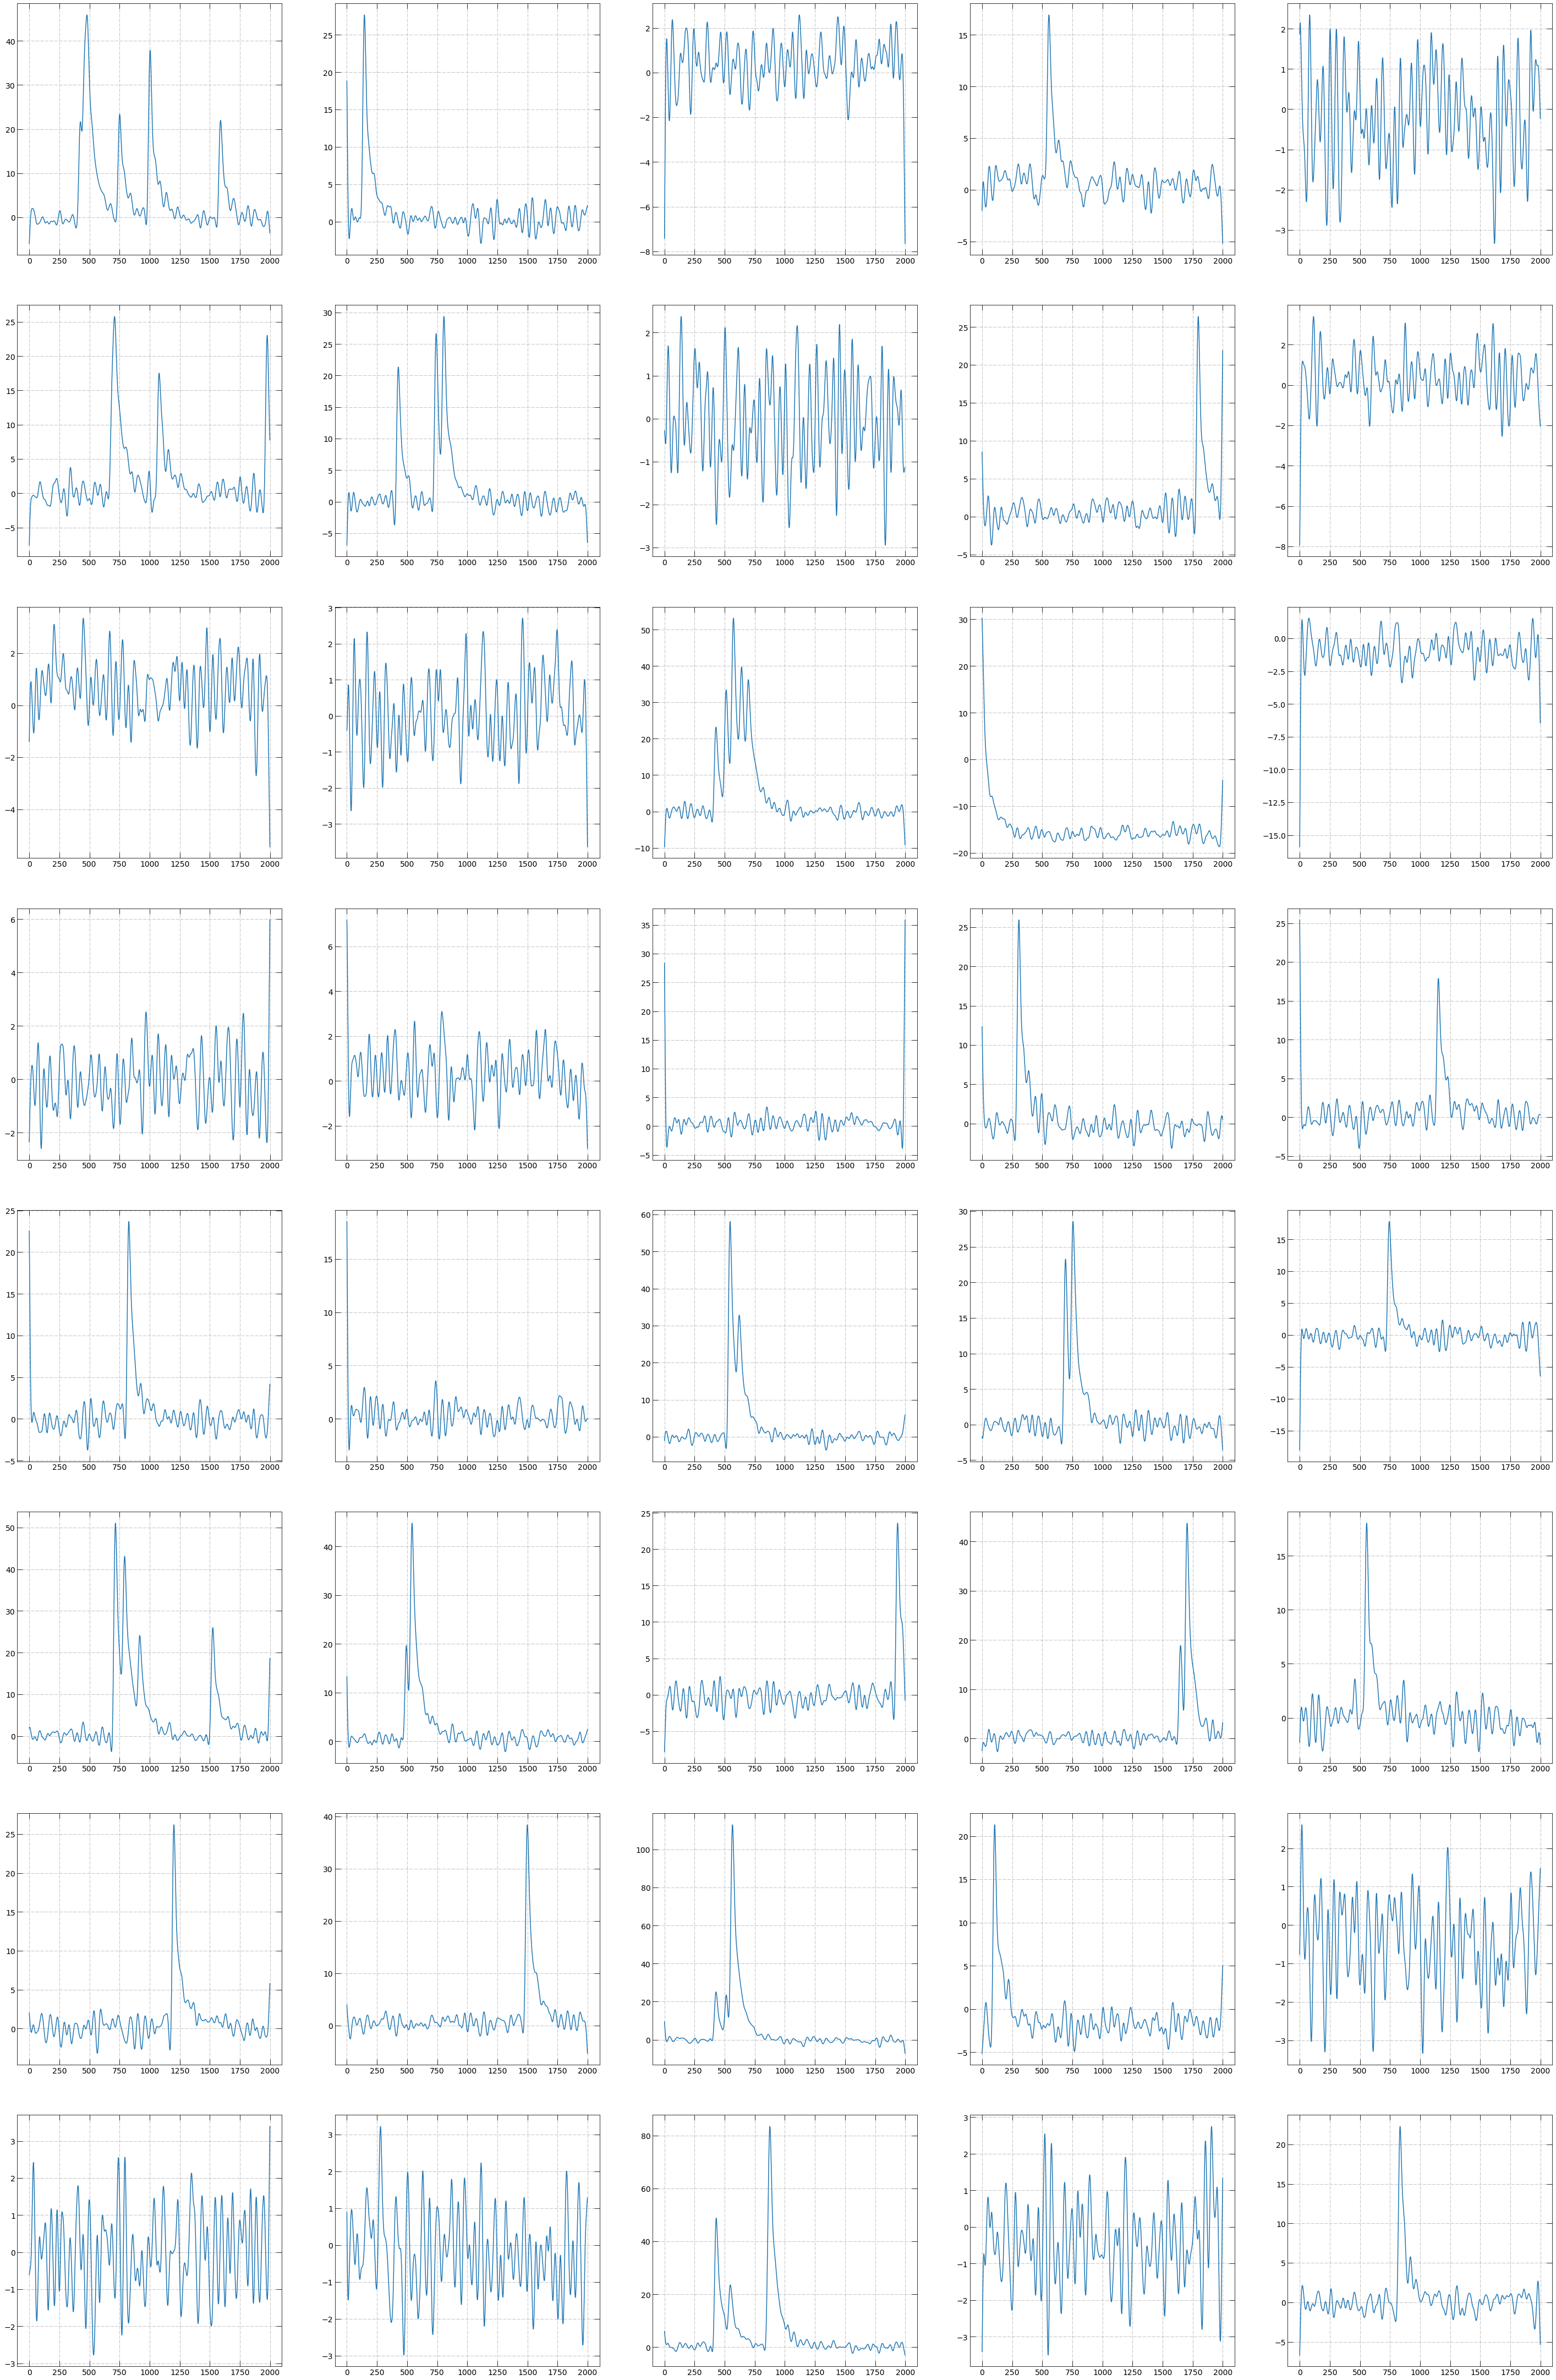

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter

nrows, ncols = 20, 5

fig = plt.figure(figsize=(50,200))    
for i in range(1,41):
    ax = fig.add_subplot(nrows, ncols, i)
    data=mydata['Ch4'][i-1]

    b, a = signal.butter(3, 0.05)
    zi = signal.lfilter_zi(b, a)
    z, _ = signal.lfilter(b, a, data, zi=zi*data[0])
    z2, _ = signal.lfilter(b, a, z, zi=zi*z[0])
    y = signal.filtfilt(b, a, data)    

    ax.plot(y)

plt.show()

In [24]:
from scipy import stats

linreg_array = np.array([])
arr=mydata['Ch4']

for row in arr[:,:300]:
    y = row
    #print(y.shape)
    x = np.arange(len(row))
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    trend=np.absolute(slope)
    mask=[trend < 0.001 ]
    
    linreg_array = np.append(linreg_array, mask, axis=0)
    linreg_array=linreg_array > 0
    #print(mask)
    #print(trend)
    #plt.plot(row)
eventSel=arr[linreg_array]
print(eventSel.shape)

linreg_array2 = np.array([])
for row in eventSel[:,1400:2000]:
    y = row
    #print(y.shape)
    x = np.arange(len(row))
    
    slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
    trend=np.absolute(slope)
    
    mask=[trend < 0.01 ]
    
    linreg_array2 = np.append(linreg_array2, mask, axis=0)
    linreg_array2 = linreg_array2 > 0
    #print(mask)
    #print(trend)
    #plt.plot(row)
test=eventSel[linreg_array2]
print(test.shape)



(2553, 2000)
(2336, 2000)


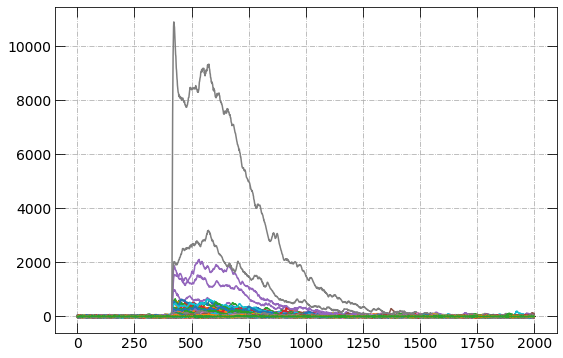

In [26]:
baseline = eventSel[0:eventSel.size, 0:100].mean(axis=1)
#print(arr.size)
#Nevent = (baseline.size)
#print('nevent', Nevent)
blines = baseline.reshape(baseline.size, 1)
clean = eventSel-blines
clean.shape
for row in clean:
    plt.plot(row)
    #print(row)
    #gauss=gaussian_filter(row, sigma=1)

    #plt.plot(gauss)